<a href="https://colab.research.google.com/github/aleksejalex/special-octo-engine/blob/main/HWK/01ZLMA_ex01_HWK1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Necessary theory recap from Lectures 01-03

Let's consider (m1):
  1. realization $(y_i,\ldots,y_n)$ of $iid$ random variables $Y_1,\ldots,Y_n$ with probability density function $f(y;\theta;\phi)$ from an exponential family of probability distributions
  $$f(y;\theta;\phi) = exp\left(\frac{y \theta - b(\theta)}{a(\phi)} - c(y,\phi)\right),$$
  where conditions of regularity are fulfilled (one dimensional case, i.e. $y_i,\theta_i \in R, a(\phi) >0, \phi >0)$.
  2. Regression matrix $X$ and vector of unknown parameters $\beta$, linear predictor $η = X \beta$
  3. A link function $g(x)$
  $$\eta_i = g(\mu_i) = x_i^T \beta, \ \text{where} \ \mu_i = E[Y_i] \ \ i = 1,\ldots,n$$

The dispersion $a(\phi)$ is typically known. If not, we take it as nuisance parameter.

Link function satisfying $g(\mu_i) = \theta_i$ is called canonical.

For $b(\theta) \in C^2$ we showed:
$$E[Y] = b'(\theta) $$
$$V[Y] = a(\phi) b''(\theta) $$
and defined variance function $v(\mu) = \frac{\partial \mu}{\partial \theta}$, i.e. $V[Y] = a(\phi) v(\mu)$

Relations:

$$
\beta \xrightarrow[]{\eta_i = x_i^T\beta} \eta
\xrightarrow[]{\mu_i = g^{-1}(\eta_i)}  \mu
\xrightarrow[]{\theta_i = (b')^{-1}(\mu_i)}  \theta
$$ 

Inverse relatiions
$$
\eta_i 
\xleftarrow[]{}  \mu
\xleftarrow[]{}  \theta
$$ 


**Lemma**:
Let Y have an exponential type distribution with density given in m1, where $b(\theta)$ is 2 times continuously differentiable, then there exists a everywhere finite moment generating function $M_Y(t) = E[e^{ty}]$ that is 2 times differentiable at 0 and it holds:
* $E[Y] = b'(\theta)$ 
* $V[Y] = a(\phi) b''(\theta)$

## HW 01

Compute $E[Y]$, $V[Y]$, and $v(Y)$ by the help of moment generating function theory for the following disributions:
* Normal: $N(\mu,\sigma^2)$
* Poisson: $Poi(\lambda)$
* Bernoulli: $Ber(p)$
* Gamma: $\Gamma[a,p]$
* Inverse: Gaussian $IG[\mu, \lambda]$


Questions:
* Which distributions can fulfill homoscedasticity?
* For which distribution the variance increases with the square of the mean value?
* Does exists a distribution, where $V[Y] = k \cdot \mu$ ?


## Solution



####  Normal: $N(\mu,\sigma^2)$
$f(y, \mu, \sigma^2) = \frac{1}{\sqrt {{(2\pi )} \sigma^2}}  {\mathrm {e}}^-{\frac{{\left(y- \mu \right)}^{T}{\left( y-\mu \right)}}{\sigma^2}} = {\mathrm {e}}^{\frac{y \mu - \frac{\mu^2}{2}}{\sigma^2} - \left(  \frac{y^2}{2\sigma^2} + \frac{1}{2} ln(2 \pi \sigma^2) \right)}$

* $\theta = \mu  \Rightarrow b(\theta) = \frac{\mu^2}{2}$
* $\phi = \sigma^2 ⇒ a(\phi) = \sigma^2$
*  $E[Y] = b'(\theta) = \mu$
* $V[Y] = \sigma^2 b''(\theta)= \sigma^2 $

Linear variance function: $v(\mu) = 1$





####  Poisson: $Poi(\lambda)$

$f(x,\lambda) = \frac{\lambda^x e^{-\lambda}}{x!} = exp(x ln(\lambda)  -\lambda -ln(x!)) $

* $\theta = ln(\lambda) \Rightarrow b(\theta) = e^{\theta}  \ \text{and} \  \phi = 1$
*  $E[Y] = b'(\theta) = e^{\theta} = \lambda$
* $V[Y] = b''(\theta)=e^{\theta} = \lambda$

Linear variance function: $v(\mu) = \mu$




In [ ]:
import numpy as np
import scipy as scp
import sympy as sp

In [ ]:
sp.init_printing(use_unicode=True, wrap_line=False)
x = sp.Symbol('x')
sp.integrate(x**2 + x + 1, x)

In [ ]:
f = sp.Function('f')
f = x**2 + 5

In [ ]:
sp.integrate(f,x)

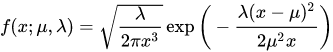

In [ ]:
inv_gauss = sp.Function('inv_gauss')
x, mi, lmbda = sp.symbols('x, mi, lmbda')

inv_gauss = sp.sqrt( (lmbda)/(2*sp.pi * x**3) ) * sp.exp(- (lmbda*(x-mi)**2)/(2*mi**2*x) )
sp.pprint(inv_gauss)

In [ ]:
sp.integrate(inv_gauss * x, x)

In [ ]:
sp.integrate(inv_gauss * x, (x, -sp.oo, sp.oo))

In [ ]:
sp.integrate(inv_gauss * x, (x, -1, 1))

image.png

In [ ]:
ber = sp.Function('ber')
k, p = sp.symbols('k, p')

ber = p**k * (1-p)**(1-k)
sp.pprint(ber)

In [ ]:
sp.integrate(ber * k, (k, 0, 1))